##          **IRIS FLOWER CLASSIFICATION**

In [1]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Read the Iris dataset into a Pandas DataFrame
df = pd.read_csv("Iris.csv")


In [3]:
# Get the shape of the DataFrame (number of rows and columns)
df.shape

(150, 5)

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Display the last 5 rows of the DataFrame
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Get information about the DataFrame (data types, non-null counts, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Get summary statistics for the DataFrame
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Check for duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(3)

In [9]:
# Check for missing values in the DataFrame
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Remove any duplicate rows from the DataFrame
df.drop_duplicates(inplace= True)

In [11]:
# Check the updated information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [12]:
# Get the value counts for the 'species' column
v = df['species'].value_counts().reset_index()
v

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


In [13]:
# Encode the 'species' column as numeric values using LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [14]:
# Separate the features (X) and target variable (Y)
X = df.drop(columns='species')
y = df['species']

In [15]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [17]:
# Split the data into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=44)

In [18]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
138,6.0,3.0,4.8,1.8
140,6.7,3.1,5.6,2.4
110,6.5,3.2,5.1,2.0
109,7.2,3.6,6.1,2.5
87,6.3,2.3,4.4,1.3


In [19]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
123,6.3,2.7,4.9,1.8
50,7.0,3.2,4.7,1.4
49,5.0,3.3,1.4,0.2
144,6.7,3.3,5.7,2.5


In [20]:
Y_train.head()

138    2
140    2
110    2
109    2
87     1
Name: species, dtype: int64

In [21]:
y_test.head()

130    2
123    2
50     1
49     0
144    2
Name: species, dtype: int64

In [22]:
# Create a correlation matrix for the feature data
m_corr = df.drop(columns = 'species', axis=1)
m_corr.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Figure size 1000x800 with 0 Axes>

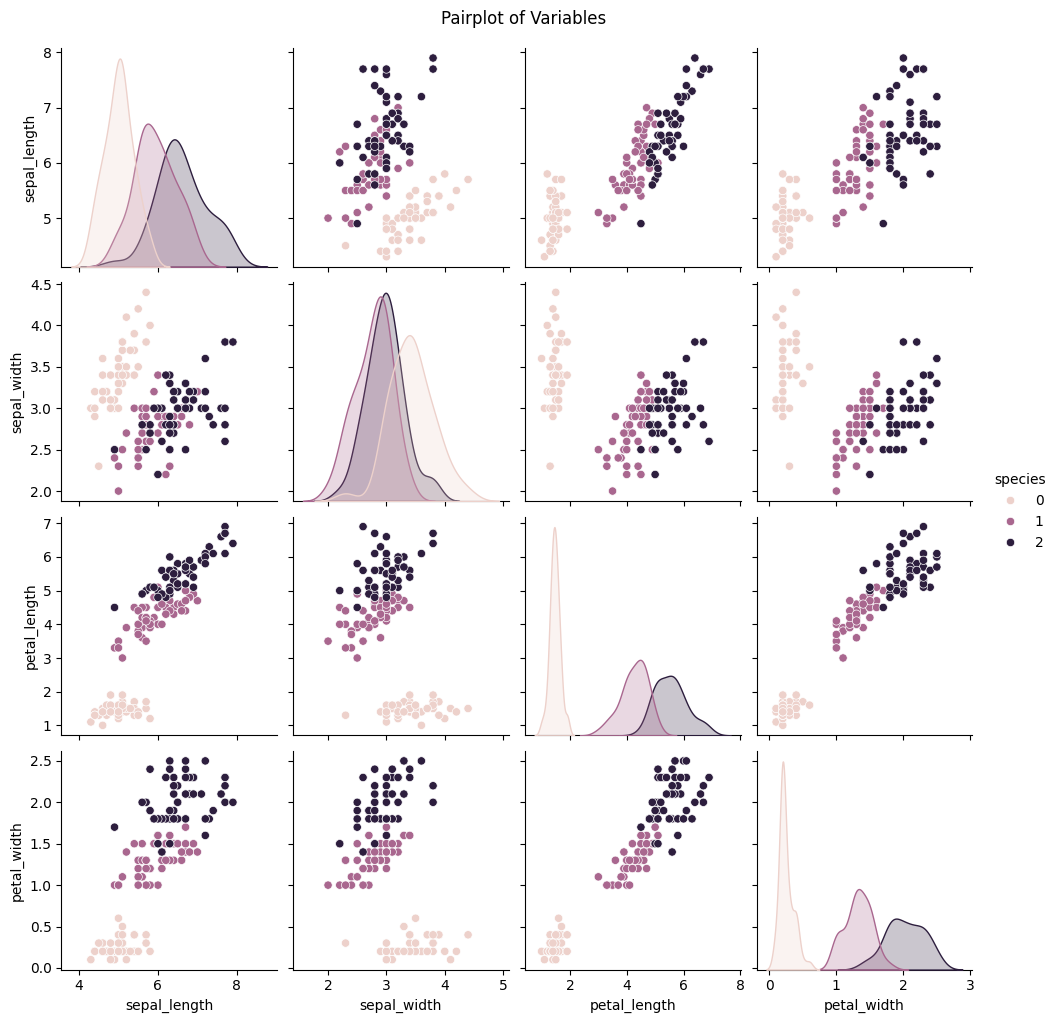

In [23]:
# Create a pairplot to visualize the relationships between the features

plt.figure(figsize=(10, 8))  # Set the size of the pairplot
sns.pairplot(df, hue="species") 
plt.suptitle('Pairplot of Variables', y=1.02)  # Add a title
plt.show()

In [24]:
# Create and train a Logistic Regression model
logis_reg = LogisticRegression()
logis_reg.fit(X_train,Y_train)

LogisticRegression()

In [25]:
# Evaluate the model's performance on the test set
logis_reg.score(x_test,y_test)

0.9666666666666667

In [26]:
# Evaluate the model's performance on the training set
logis_reg.score(X_train, Y_train)

0.9743589743589743

In [35]:
# Use the trained model to predict the species for a new sample
logis_reg.predict([[5.1,3.5,1.4,0.2]])


array([0])

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


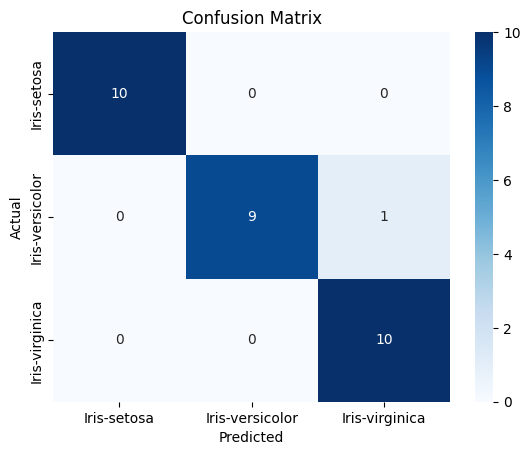

Accuracy: 0.97
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [28]:
# Predict the labels for the test set
Y_pred = logis_reg.predict(x_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, Y_pred, target_names=label_encoder.classes_))


The confusion matrix indicates that the model correctly predicted 10 instances of Iris-setosa, 9 instances of Iris-versicolor, and 10 instances of Iris-virginica. The overall accuracy of the model is **0.97**, and the macro and weighted average F1-scores are also 0.97, suggesting a high level of performance. 

The results indicate that the model is effective in distinguishing between the three iris flower species based on dataset.